In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

In [34]:
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

In [37]:
def compress_dct(image, threshold=0.01):
    # Split the image into its color channels
    b, g, r = cv.split(image)
    
    # Apply DCT to each color channel
    dct_b = dct2(b)
    dct_g = dct2(g)
    dct_r = dct2(r)
    
    # Zero out small DCT coefficients
    dct_b[np.abs(dct_b) < threshold * np.max(dct_b)] = 0
    dct_g[np.abs(dct_g) < threshold * np.max(dct_g)] = 0
    dct_r[np.abs(dct_r) < threshold * np.max(dct_r)] = 0
    
    return dct_b, dct_g, dct_r

In [36]:
def decompress_dct(dct_b, dct_g, dct_r):
    # Apply inverse DCT to each color channel
    idct_b = idct2(dct_b)
    idct_g = idct2(dct_g)
    idct_r = idct2(dct_r)
    
    # Merge the channels back into a single image
    return cv.merge((idct_b, idct_g, idct_r))

(900, 598, 3)
dct (900, 598, 3)


(-0.5, 597.5, 899.5, -0.5)

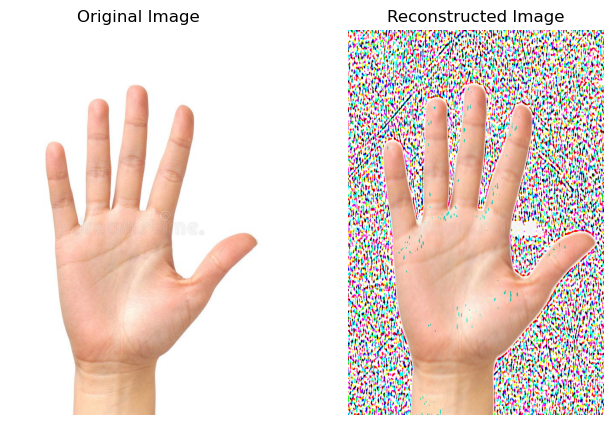

In [44]:
path = r"C:\Users\Fernanda Januar\hand.jpg"
image = cv.imread(path)

# Compress the image using DCT
'''You can adjust the threshold parameter to control the level of compression'''
threshold = 0.0001  # Adjust the threshold for compression
dct_b, dct_g, dct_r = compress_dct(image, threshold)

# Decompress the image to reconstruct it
reconstructed_image = decompress_dct(dct_b, dct_g, dct_r)

print(image.shape)
print("dct", reconstructed_image.shape)

#__________________________________________________________________
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(cv.cvtColor(reconstructed_image.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.axis('off')